<a href="https://colab.research.google.com/github/pfbenassi/2020_dsnp/blob/master/Analisando_os_Dados_do_Airbnb_Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img alt="Vista Lisboa - Portugal"  width="100%" src="https://cdn.civitatis.com/portugal/lisboa/guia/lisboa.jpg">
</p>

# Análise dos Dados do Airbnb - *Lisboa*
*by [Paulo Benassi](https://www.linkedin.com/in/paulo-fernando-abse-benassi-66113098)*


---

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

## Um pouco sobre Lisboa

Com uma história muito antiga e rica que faz perder a sua origem na bruma dos séculos, Lisboa cresceu a partir da colina do Castelo. Foi habitada por Fenícios, Gregos, Romanos e Mouros e, em 1147, conquistada por D. Afonso Henriques. Em 1255, Lisboa tornava-se capital do reino.

**Neste *notebook*, iremos analisar os dados referentes à cidade de Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória, será baixado apenas o arquivo:

* `listings.csv` - *Summary information and metrics for listings in Lisbon (good for visualisations).*

*Obs.: Os dados obtidos para tal análise foram acessados em 21/06/2020 às 11:30h e, no momento desse acesso, as informações que estavam disponíveis eram referente ao dia 28/05/2020.*


In [40]:
# importar os pacotes necessarios
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns 
 
%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2020-05-28/visualisations/listings.csv")

## Análise dos Dados

Nesta etapa tem-se o objetivo de criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id`: número de id gerado para identificar o imóvel
* `name`: nome da propriedade anunciada
* `host_id`: número de id do proprietário (anfitrião) da propriedade
* `host_name`: nome do anfitrião
* `neighbourhood_group`: esta coluna contém grupos de bairros
* `neighbourhood`: bairro
* `latitude`: coordenada da latitude da propriedade
* `longitude`: coordenada da longitude da proriedade
* `room_type`: tipo de quarto disponível na propriedade
* `price`: preço para alugar o imóvel
* `minimum_nights`: quantidade mínima de noites para reservar
* `number_of_reviews`: número de avaliações que a propriedade possui
* `last_review`: data da última avaliação
* `reviews_per_mounth`: quantidade de avaliações por mês
* `calculated_host_listings_count`: quantidade de imóveis do mesmo anfitrião
* `availability_365`: número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,26,2020-01-03,0.37,1,340
1,25659,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,60,3,113,2019-12-08,1.52,1,321
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,60,1,321,2020-03-11,2.80,1,350
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71239,-9.12887,Entire home/apt,60,2,239,2020-03-15,2.45,2,296
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71195,-9.15877,Entire home/apt,1100,2,55,2020-03-15,0.48,2,322


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.
Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv` há uma versão mais completa com **24302** entradas e **106** variáveis (`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# Exibir dos tipos de dados de cada uma das variáveis presentes no dataset
print("Tipos das variáveis:")
display(df.dtypes)

Entradas:	 24302
Variáveis:	 16

Tipos das variáveis:


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível observar que as colunas `reviews_per_mounth` e `last_review` possuem aproximadamente 17% dos seus valores faltantes.
* As variáveis `name` e `host_name` possuem aproximadamente 0,1% dos seus valores nulos.

Conclui-se que os valores nulos não são tão significativos para este dataset uma vez que não influenciará na análise proposta inicialmente.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(round((df.isnull().sum() /df.shape[0])*100,4)).sort_values(ascending=False)

reviews_per_month                 17.3936
last_review                       17.3936
name                               0.0782
host_name                          0.0041
availability_365                   0.0000
calculated_host_listings_count     0.0000
number_of_reviews                  0.0000
minimum_nights                     0.0000
price                              0.0000
room_type                          0.0000
longitude                          0.0000
latitude                           0.0000
neighbourhood                      0.0000
neighbourhood_group                0.0000
host_id                            0.0000
id                                 0.0000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

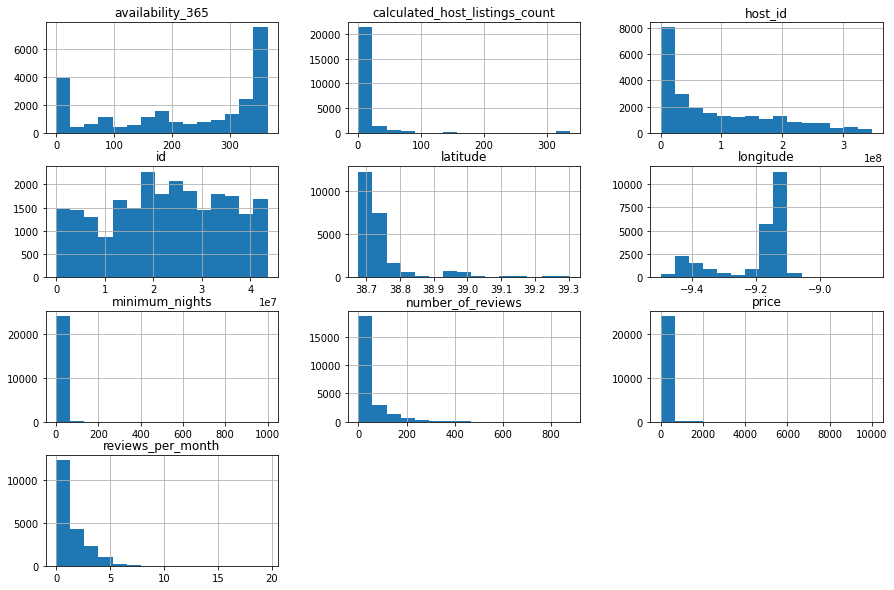

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**


Pela distribuição do histograma é possível verificar indícios da presença de *outliers*. Analise por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# Resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,24302.000000,24302.000000,24302.000000,20075.000000,24302.000000,24302.000000
mean,111.541848,3.391367,41.446054,1.385960,14.835322,223.512880
std,351.691298,16.272085,65.824770,1.411868,42.781736,135.147466
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,47.000000,1.000000,2.000000,0.290000,1.000000,97.000000
50%,70.000000,2.000000,13.000000,0.890000,3.000000,269.000000
75%,100.000000,3.000000,53.000000,2.100000,10.000000,351.000000
max,10000.000000,1000.000000,877.000000,19.610000,336.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 100, porém, seu valor máximo é 10000;
* Ainda sobre a variável `price` é importante observar que o valor mínimo é 0. Tais valores representam 0,22% de todas as entradas;
* A variável `minimum_nights` possui média de exigência de 3 noites, porém, o valor máximo de noites exigidas está em 1000 (acima de 365 dias no ano)

#### Boxplot para `minimum_nights`

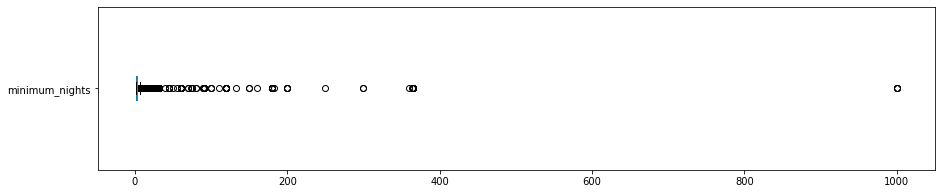


minimum_nights valores acima de 30:
111 entradas
0.4568%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Exibir quantidade de valores acima de 30 dias para minimum_nights
print("\nminimum_nights valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100))

### Boxplot para `price`

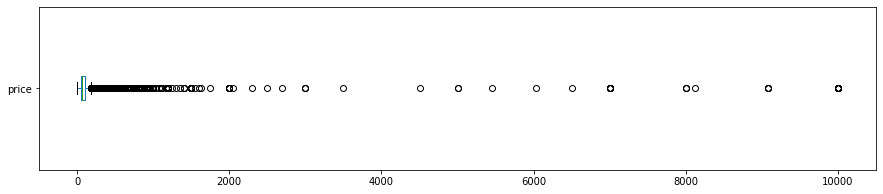


price - valores acima de 500:
401 entradas
1.6501%

price - valores = 0:
54 entradas
0.2222%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Exibir a quantidade de valores acima de 500 para price
print("\nprice - valores acima de 500:")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0]) * 100))

# Exibir a quantidade de valores 0 para price
print("\nprice - valores = 0:")
print("{} entradas".format(len(df[df.price == 0])))
print("{:.4f}%".format((len(df[df.price == 0]) / df.shape[0]) * 100))

### Histograma sem *outliers*

Uma vez identificado *outliers* nas variáveis `price` e `minimum_nights` iremos providenciar a limpeza do *DataFrame* desses atributos e plotar novamente o histograma.

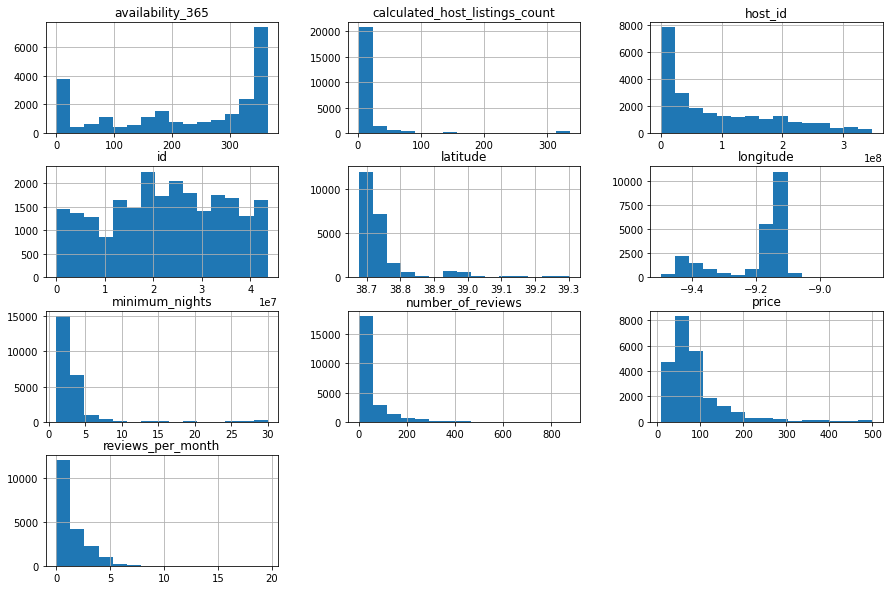

In [ ]:
# remover os *outleirs* em um novo dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**

Após retirar os *outliers* podemos plotar novamente o **Resumo Estatístico** para o atributo `price` e verificar que a média no valor dos aluguéis é de **86.37**.

In [ ]:
# Resumo Estatístico para análise dos valores contidos na variável price após limpeza do Dataset
df_clean[['price']].describe()

,price
count,23736.000000
mean,86.369397
std,69.518551
min,8.000000
25%,47.000000
50%,69.000000
75%,100.000000
max,500.000000


In [ ]:
# ver a média da coluna `price``
print("Média: \n" + str(round(df_clean[['price']].mean(),2)))

Média: 
price    86.37
dtype: float64


### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando uma relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.030887,-0.125457,-0.119951,-0.011059,0.047205
minimum_nights,-0.030887,1.000000,-0.054348,-0.097057,-0.027607,-0.044357
number_of_reviews,-0.125457,-0.054348,1.000000,0.804058,-0.087371,0.069841
reviews_per_month,-0.119951,-0.097057,0.804058,1.000000,-0.100135,0.061120
calculated_host_listings_count,-0.011059,-0.027607,-0.087371,-0.100135,1.000000,0.057861
availability_365,0.047205,-0.044357,0.069841,0.061120,0.057861,1.000000


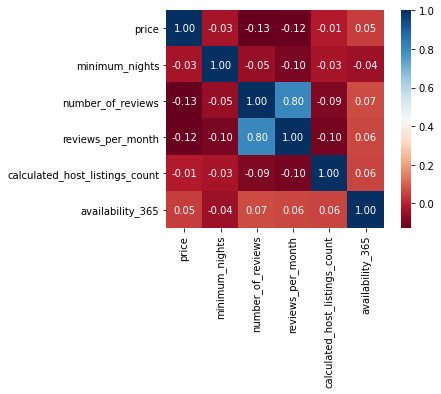

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    17356
Private room        5533
Hotel room           439
Shared room          408
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.731210
Private room       0.233106
Hotel room         0.018495
Shared room        0.017189
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara de Lisboa?**

Uma maneira de verificar uma variável em função da outra é usando o método `group_by()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Vermelha                                           292.500000
Cardosas                                           280.000000
Aveiras de Baixo                                   269.500000
Ota                                                249.000000
Freiria                                            220.000000
Peral                                              176.800000
Meca                                               163.000000
Enxara do Bispo, Gradil e Vila Franca do Rosrio    161.692308
Vale do Paraso                                     150.000000
Santa Brbara                                       140.777778
Name: price, dtype: float64

Uma vez que não tenho conhecimento prévio sobre os bairros mais caros em Lisboa, na próximas células analiso a quantidade de entradas para os 3 bairros apontados como mais caros simplesmente para não apresentar amostras não-representativas.

In [ ]:
# Quantidade de Imóveis no bairro Vermelha
print(df_clean[df_clean.neighbourhood == 'Vermelha'].shape)

# Ver as 2 entradas do bairro Vermelha
df_clean[df_clean.neighbourhood == 'Vermelha']

(2, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5483,12451045,Sunny and Lovely Farm House/Pool,67363770,Solange,Cadaval,Vermelha,39.26844,-9.10864,Entire home/apt,235,5,19,2019-09-01,0.40,1,173
20660,36683641,Large house for amazing family holidays. 12 pe...,275719003,Laura,Cadaval,Vermelha,39.27082,-9.10679,Entire home/apt,350,2,5,2020-05-31,0.51,1,310


In [ ]:
# Quantidade de Imóveis no bairro Cardosas
print(df_clean[df_clean.neighbourhood == 'Cardosas'].shape)

# Ver a entrada do bairro Cardosas
df_clean[df_clean.neighbourhood == 'Cardosas']

(1, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11312,21510142,Casal do Portinho # 15/20PAX 30min LISBOA,150414336,Patricia,Arruda Dos Vinhos,Cardosas,38.97477,-9.03993,Entire home/apt,280,2,37,2020-06-01,1.18,1,305


In [ ]:
# Quantidade de Imóveis no bairro Aveiras de Baixo
print(df_clean[df_clean.neighbourhood == 'Aveiras de Baixo'].shape)

# Ver as 2 entradas do bairro Cardosas
df_clean[df_clean.neighbourhood == 'Aveiras de Baixo']

(2, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2019,3495167,Casa de campo de encanto,5713513,Anna,Azambuja,Aveiras de Baixo,39.10918,-8.86285,Entire home/apt,450,1,0,NaN,NaN,1,365
14002,25499427,Holiday house near Azambuja - District of Lisbon,72092826,Laure,Azambuja,Aveiras de Baixo,39.10863,-8.83827,Entire home/apt,89,7,5,2019-08-29,0.4,2,344


Com a análise anterior podemos verificar que o resultado a pergunta qual(is) bairro mais caro encontra-se equivocada e apresenta resultado não-significativo.

Como o dataset analisado possui a Latitude e Longitude para os imóveis é possível plotar cada imóvel como um ponto. Para isso considera-se `x=longitude` e `y=latitude`.

Se observar bem a projeção apresenta semelhança com o mapa de Lisboa e é possível notar uma maior concentração de pontos na região do litoral.

<img alt="Vista Lisboa - Portugal"  width="50%" src="https://upload.wikimedia.org/wikipedia/commons/5/57/Lisboa_freguesias_2012.svg">

Imagem disponível em: https://pt.wikipedia.org/wiki/Lista_de_freguesias_de_Lisboa

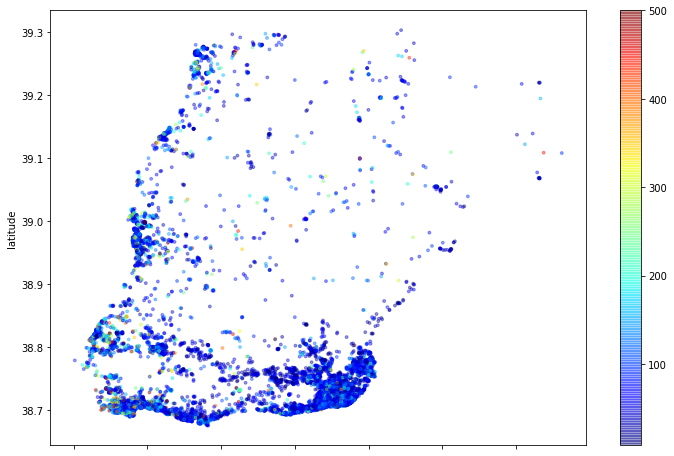

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
print("Quantidade mínima de noites: " + str(round(df_clean['minimum_nights'].mean(),2)))

Quantidade mínima de noites: 2.75


## Conclusões


Nesse estudo inicial foi realizada uma análise superficial na base de dados do Airbnb, porém, já se percebe que existem *outliers* em algumas das variáveis.

Ao tentar analisar a localidade mais cara é possível notar que há poucos imóveis disponíveis em alguns bairros, o que acarreta o distorcimento de informações estatísticas de alguns atributos.

Por fim, o *dataset* analisado é uma versão resumida ideal para uma abordagem inicial e também para fins didáticos (como foi o meu caso...rs). Para uma análise mais apurada, recomenda-se que em uma próxima análise exploratória seja utilizado o conjunto de dados completos com 106 atributos disponíveis.